In [1]:
import pickle
import numpy as np
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from dp_inference_clean.common_dist_framework import *
from dp_inference_clean.estimators import *
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']

In [15]:
df_list_len = []
df_list_cov = []
date_v_lst = [f"m5d16v{i}" for i in range(0,2)]
# date_v_lst.append("m5d22v3")
int_type = "" # _quick_,_midquick_, _short_, _midshort_
alpha = 0.05
exp = 1.5
thresh_plot = 150
alg_type = "Neurips_adult_c" # "Abthresh_mean_c","Unif_c","Abthresh_median_c"
total_dims = 5
plot_dim_val = 0
gvdp_res = True
legend_font_size = 14

In [16]:
df_list_len = [[] for dim_val in range(total_dims)]
df_list_cov = [[] for dim_val in range(total_dims)]

for dim_val in range(total_dims):
    for date_v in date_v_lst:
        files_dir = f'../../results/{alg_type}ov_{1 - alpha}_and_len/{date_v}/dim{dim_val}/'
        file_list = [file for file in os.listdir(files_dir) if '.pickle' in file and int_type in file]
        for file_name in file_list:
            file_path = files_dir + file_name
            if "_cov" in file_name:
                df_list_cov[dim_val].append(pd.read_pickle(file_path))
            elif "_len" in file_name:
                df_list_len[dim_val].append(pd.read_pickle(file_path))
            else:
                "ERROR"
print(file_list)

['Adult_2000_mean_cov.pickle', 'Adult_2000_mean_len.pickle', 'Adult_4000_mean_cov.pickle', 'Adult_4000_mean_len.pickle', 'Adult_6000_mean_cov.pickle', 'Adult_6000_mean_len.pickle', 'Adult_8000_mean_cov.pickle', 'Adult_8000_mean_len.pickle']


In [17]:
df_combined_all = pd.concat(df_list_cov[plot_dim_val])
df_combined_all

,n,trial,resamp,eps_total,eps_param,normal_proper_blb,proper_unstud,boot_unstud_priv
0,1000,0,0,5,2.5,1,1,1
1,1000,0,1,5,2.5,1,1,1
2,1000,0,2,5,2.5,1,1,1
3,1000,0,3,5,2.5,1,1,1
4,1000,0,4,5,2.5,1,1,1
...,...,...,...,...,...,...,...,...
47995,8000,79,595,8,4.0,1,1,1
47996,8000,79,596,8,4.0,1,1,1
47997,8000,79,597,8,4.0,1,1,1
47998,8000,79,598,8,4.0,1,1,1


In [18]:
df_list_cov[plot_dim_val][0]

,n,trial,resamp,eps_total,eps_param,normal_proper_blb,proper_unstud,boot_unstud_priv
0,1000,0,0,5,2.5,1,1,1
1,1000,0,1,5,2.5,1,1,1
2,1000,0,2,5,2.5,1,1,1
3,1000,0,3,5,2.5,1,1,1
4,1000,0,4,5,2.5,1,1,1
...,...,...,...,...,...,...,...,...
9995,1000,79,120,5,2.5,1,1,1
9996,1000,79,121,5,2.5,1,1,1
9997,1000,79,122,5,2.5,1,1,1
9998,1000,79,123,5,2.5,1,1,1


In [19]:
if gvdp_res:
    exp = 1.5
    date_v_lst = [f"m10d16v{i}" for i in range(2,4) ]
    alg_type = f"Final_adult_gvdp_c" # "Abthresh_mean_c","Unif_c","Abthresh_median_c"
    df_gvdp_list_len = []
    df_gvdp_list_cov = []
    for date_v in date_v_lst:
        files_dir = f'../../results/{alg_type}ov_{1 - alpha}_and_len/{date_v}/'
        file_list = [file for file in os.listdir(files_dir) if '.pickle' in file and int_type in file]
        for file_name in file_list:
            file_path = files_dir + file_name
            if "_cov" in file_name:
                df_gvdp_list_cov.append(pd.read_pickle(file_path))
            elif "_len" in file_name:
                df_gvdp_list_len.append(pd.read_pickle(file_path))
            else:
                "ERROR"
    print(file_list)
    df_gvdp_combined_all = pd.concat(df_gvdp_list_cov)
    drop_cols = ['dist']
    df_gvdp_combined_all = df_gvdp_combined_all.drop(columns=drop_cols)
    df_gvdp_combined_all_len = pd.concat(df_gvdp_list_len)
    df_gvdp_combined_all_len = df_gvdp_combined_all_len.drop(columns=drop_cols)
    print(df_gvdp_combined_all)
    

['Adult_2000_mean_cov.pickle', 'Adult_2000_mean_len.pickle', 'Adult_4000_mean_cov.pickle', 'Adult_4000_mean_len.pickle', 'Adult_6000_mean_cov.pickle', 'Adult_6000_mean_len.pickle', 'Adult_8000_mean_cov.pickle', 'Adult_8000_mean_len.pickle']
        n  trial  resamp  eps_total  gvdp
0    2000      0       0          8     0
1    2000      1       0          8     1
2    2000      2       0          8     1
3    2000      3       0          8     1
4    2000      4       0          8     1
..    ...    ...     ...        ...   ...
155  8000    155       0          5     1
156  8000    156       0          5     1
157  8000    157       0          5     1
158  8000    158       0          5     1
159  8000    159       0          5     1

[1280 rows x 5 columns]


In [20]:
gvdp_arr = np.array(df_gvdp_combined_all['gvdp'])

# Coverage

In [21]:
alg_lst = ['normal_proper_blb','proper_unstud','boot_unstud_priv']
alg_name_dict = {'normal_proper_blb':'Normal + BLBvar',
                 'boot_unstud_priv':'Non-private baseline',
                 'proper_unstud':'Percentile + BLBquant'}
marker_dict = {'normal_proper_blb':'o','boot_unstud_priv':'^','proper_unstud':'s'}
color_dict = {'boot_unstud_priv':'tab:orange',
              'normal_proper_blb':'tab:blue',
              'proper_unstud':'tab:green'}

In [22]:
eps_total_lst = [8,5]
eps_param_frac_lst = [0.5]
# eps_total_lst = [10]
# eps_param_frac_lst = [0.5]
dim_lst = [plot_dim_val]


0


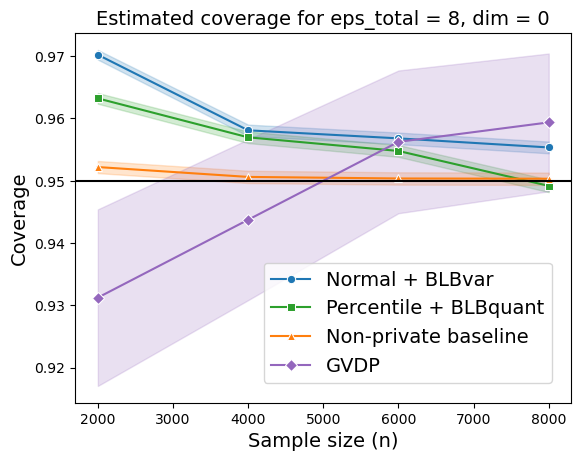

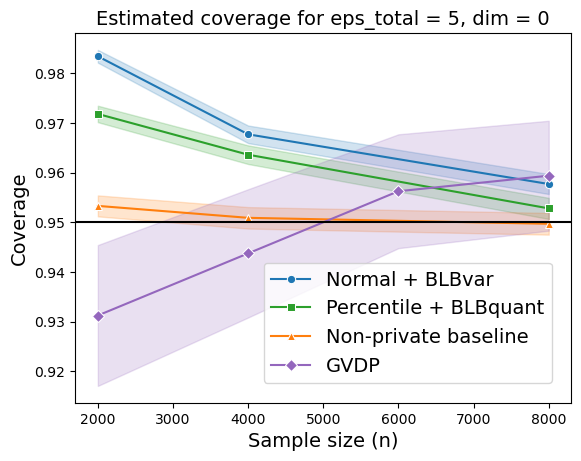

In [23]:
drop_cols_lst = ['eps_total','eps_param']
for dim_val in dim_lst:
    print(dim_val)
    df_combined_all = pd.concat(df_list_cov[dim_val])
    for eps_total in eps_total_lst:
        for eps_param_frac in eps_param_frac_lst:
            df_combined = df_combined_all[(df_combined_all['eps_total'] == eps_total)
                                          &(df_combined_all['n'] >= 2000) 
                                        ]
            df_combined = df_combined.drop(columns=drop_cols_lst)
            df_combined = df_combined.drop_duplicates(['n','trial','resamp'])
            if gvdp_res and dim_val == 0:
                # df_gvdp_combined = df_gvdp_combined_all[df_gvdp_combined_all['eps_total'] == eps_total]
                df_gvdp_combined = df_gvdp_combined_all
                df_gvdp_combined = df_gvdp_combined.drop(columns=['eps_total'])

            # df_combined = pd.melt(df_combined,id_vars=["n","trial","resamp"]
            #                     ,var_name="method",value_name="coverage") #,'eps_param_frac',,"eps_total"
            # display(df_combined)
            # df_combined['const_inv_sens'] = df_combined['const_inv_sens'].map(lambda x: str(x))
            plt.figure()
            for alg in alg_lst:
                sns.lineplot(data=df_combined,
                        x="n",y=alg, #hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
                        marker = marker_dict[alg],errorbar='se',estimator="mean",
                        color= color_dict[alg],label=alg_name_dict[alg])
            if gvdp_res and dim_val == 0:
                sns.lineplot(data=df_gvdp_combined,
                            x="n",y='gvdp', #hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
                            marker = 'D',errorbar='se',estimator="mean",
                            color= 'tab:purple',label='GVDP')
            
            plt.legend(loc='best', borderaxespad=1, fontsize = legend_font_size)
            plt.xlabel("Sample size (n)", fontsize = legend_font_size)
            plt.ylabel("Coverage", fontsize = legend_font_size)
            plt.axhline(1 - alpha,color = 'k')
            plt.title(f"Estimated coverage for eps_total = {eps_total}, dim = {dim_val}", fontsize = legend_font_size)
            if dim_val == 0:
                plt.savefig(f'./figures/adult_logreg_eps_{eps_total}.pdf')

            # plt.title(f"Estimated coverage for eps_total = {eps_total}, eps_param_frac = {eps_param_frac}, dim_val = {dim_val}")


# Relative Width

In [24]:
eps_total = 8

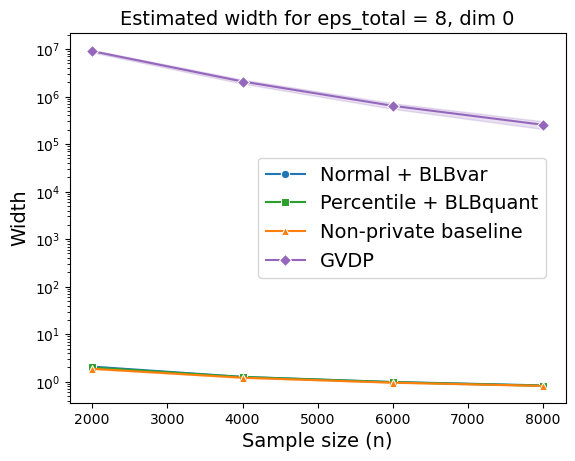

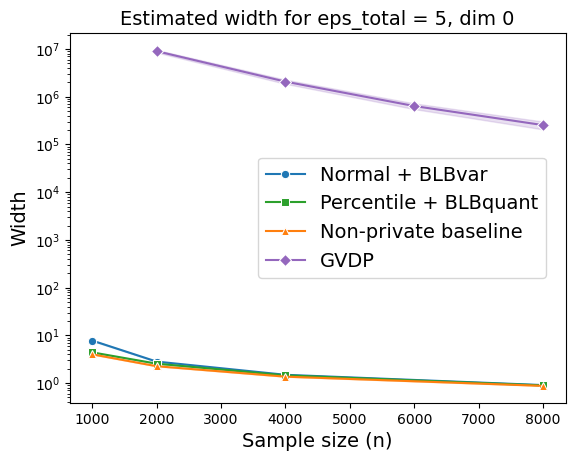

In [25]:
alg_lst = ["normal_proper_blb","proper_unstud","boot_unstud_priv"]
baseline = "boot_unstud_priv"
for dim_val in dim_lst:

    ##### Combine DataFrames #####
    df_combined_all = pd.concat(df_list_len[dim_val])
    # display(df_combined)

    # ##### Modify dataframes #####
    for eps_total in eps_total_lst:
        df_combined = df_combined_all[(df_combined_all['eps_total'] == eps_total)]
        drop_cols_lst = ['eps_total','eps_param','resamp']
        df_combined = df_combined.drop(columns=drop_cols_lst)
        df_combined = df_combined.drop_duplicates(['n','trial'])#,'eps_param'
        # for alg in alg_lst:
        #     df_combined[alg] = df_combined[alg]/df_combined[baseline]
        
        # df_combined = df_combined.drop(columns=[baseline])
        # # display(df_combined)
        if gvdp_res and dim_val == 0:
            # df_gvdp_combined = df_gvdp_combined_all[df_gvdp_combined_all['eps_total'] == eps_total]
            df_gvdp_combined = df_gvdp_combined_all_len
            df_gvdp_combined = df_gvdp_combined.drop(columns=['eps_total'])

        ##### melt to form a method column #####
        # df_combined = pd.melt(df_combined,id_vars=["n","trial"],var_name="method",value_name="rel width") #,'eps_param'
        
        # display(df_combined)


        # ##### Plot #####
        
        plt.figure()
        for alg in alg_lst:
            sns.lineplot(data=df_combined,
                        x="n",y=alg, #hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
                        marker = marker_dict[alg],errorbar='se',estimator="mean",
                        color= color_dict[alg],label=alg_name_dict[alg])
        if gvdp_res and dim_val == 0:
            df_gvdp_combined.reset_index(inplace=True)
            sns.lineplot(data=df_gvdp_combined,
                        x="n",y='gvdp', 
                        marker = 'D',errorbar='se',estimator="mean",
                        color= 'tab:purple',label='GVDP')
      
        # sns.lineplot(data=df_combined,x="n",y="rel width",hue= 'method', marker = 'o',errorbar='se',estimator="mean")
        plt.legend(loc='best', borderaxespad=1, fontsize = legend_font_size)
        plt.title(f"Estimated width for eps_total = {eps_total}, dim {dim_val}", fontsize = legend_font_size)
        plt.xlabel("Sample size (n)", fontsize = legend_font_size)
        plt.ylabel("Width", fontsize = legend_font_size)
        plt.yscale("log")
        
        if dim_val == 0:
            plt.savefig(f'./figures/adult_logreg_len_eps_{eps_total}.pdf')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


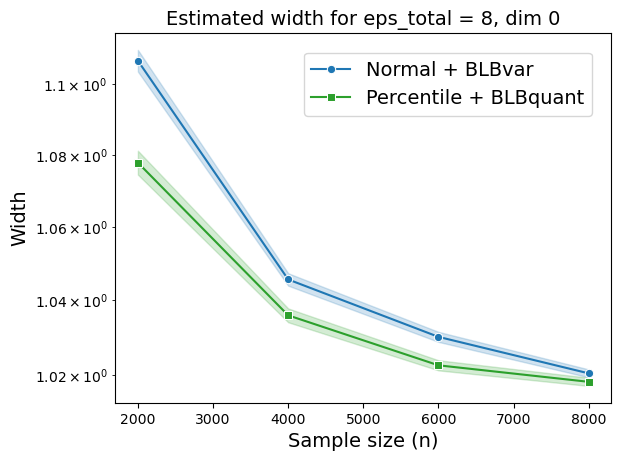

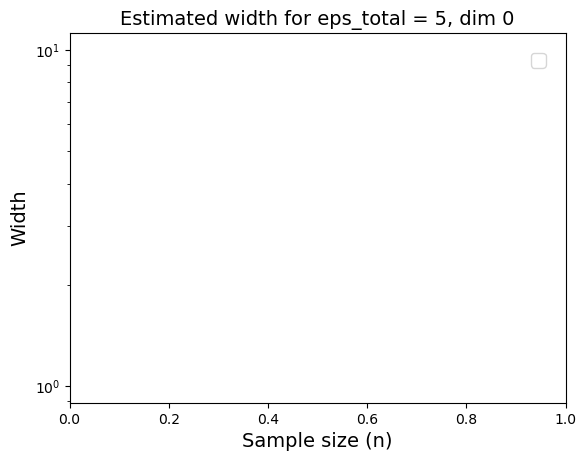

In [14]:
alg_lst = ["normal_proper_blb","proper_unstud"]
baseline = "boot_unstud_priv"
gvdp_res = False
for dim_val in dim_lst:

    ##### Combine DataFrames #####
    df_combined_all = pd.concat(df_list_len[dim_val])
    # display(df_combined)

    # ##### Modify dataframes #####
    for eps_total in eps_total_lst:
        df_combined = df_combined_all[(df_combined_all['eps_total'] == eps_total)]
        drop_cols_lst = ['eps_total','eps_param','resamp']
        df_combined = df_combined.drop(columns=drop_cols_lst)
        df_combined = df_combined.drop_duplicates(['n','trial'])#,'eps_param'
        for alg in alg_lst:
            df_combined[alg] = df_combined[alg]/df_combined[baseline]
        
        df_combined = df_combined.drop(columns=[baseline])
        # # display(df_combined)
        if gvdp_res and dim_val == 0:
            # df_gvdp_combined = df_gvdp_combined_all[df_gvdp_combined_all['eps_total'] == eps_total]
            df_gvdp_combined = df_gvdp_combined_all_len
            df_gvdp_combined = df_gvdp_combined.drop(columns=['eps_total'])

        ##### melt to form a method column #####
        # df_combined = pd.melt(df_combined,id_vars=["n","trial"],var_name="method",value_name="rel width") #,'eps_param'
        
        # display(df_combined)


        # ##### Plot #####
        
        plt.figure()
        for alg in alg_lst:
            sns.lineplot(data=df_combined,
                        x="n",y=alg, #hue='method',# style='eps_param_frac', size='eps_total', #'eps_param_frac','eps_total'
                        marker = marker_dict[alg],errorbar='se',estimator="mean",
                        color= color_dict[alg],label=alg_name_dict[alg])
        if gvdp_res and dim_val == 0:
            df_gvdp_combined.reset_index(inplace=True)
            sns.lineplot(data=df_gvdp_combined,
                        x="n",y='gvdp', 
                        marker = 'D',errorbar='se',estimator="mean",
                        color= 'tab:purple',label='GVDP')
      
        # sns.lineplot(data=df_combined,x="n",y="rel width",hue= 'method', marker = 'o',errorbar='se',estimator="mean")
        plt.legend(loc='best', borderaxespad=1, fontsize = legend_font_size)
        plt.title(f"Estimated width for eps_total = {eps_total}, dim {dim_val}", fontsize = legend_font_size)
        plt.xlabel("Sample size (n)", fontsize = legend_font_size)
        plt.ylabel("Width", fontsize = legend_font_size)
        plt.yscale("log")
        
        # if dim_val == 0:
            # plt.savefig(f'./figures/adult_logreg_len_eps_{eps_total}.pdf')
